# HW 5

In [26]:
import numpy as np
import matplotlib.pyplot as plt 
import time
import tqdm

In [27]:
!pip install cvxpy

In [28]:
# In a terminal install the cvxpy library -> "pip install cvxpy" 
# You may need to add the --user flag if you don't have admin privileges
import cvxpy as cp
import IPython.display as ipd


## 1. Optimization

In class you have learned how to form optimization problems via formulations of minimization, constraints, and penalties. 
We will now use the library CVXPY to solve the problem on your quiz as well as create a more elaborate optimization problem.

### 1.0 CVXPY Tutorial

The code block below shows you the basics of using the optimization library. <br>
It optimizes the following problem: <br>
<br>
$argmin_{x} ||y-Ax||^{2}_{2}$ <br>
subject to $x \geq 0$, $x \leq 1$

In [29]:
# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n) # creates a random matrix of size m x n
y =  np.random.randn(m) # creates a random vector of size m

# Construct the problem.
x = cp.Variable(n) # creates a variable vector of size n to be optimized
objective = cp.Minimize(cp.sum_squares(A @ x - y)) # '@' is the matrix multiplication operator
constraints = [0 <= x, x <= 1] # creates a list of constraints
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)

[-1.79109255e-19  2.85112420e-02  2.79973443e-19  3.37658729e-20
 -2.72802663e-19  1.49285011e-01 -9.94082533e-20  8.35373900e-20
  2.46718649e-01  5.78224144e-01 -4.03739463e-19  1.01242860e-03
 -9.28486180e-20  2.26767464e-01 -1.58813678e-19 -8.97232272e-20
 -1.22145729e-19 -1.51509428e-19  1.12060672e-19 -3.48318635e-19]


### 1.1 Solve Quiz 13 Problem

You are tasked with programming the motor of a robotic arm to perform various motions.
Your task is to match a theoretical motion, y, with a motion, x, that closely matches it under the
physical constraints of the motor. The constraint is that neighboring elements in x cannot have an
absolute difference greater than 5 units (the motor cannot have a change in position greater than 5
over 1 discrete unit of time). 

Assume the sampling frequency here is 5 Hz.

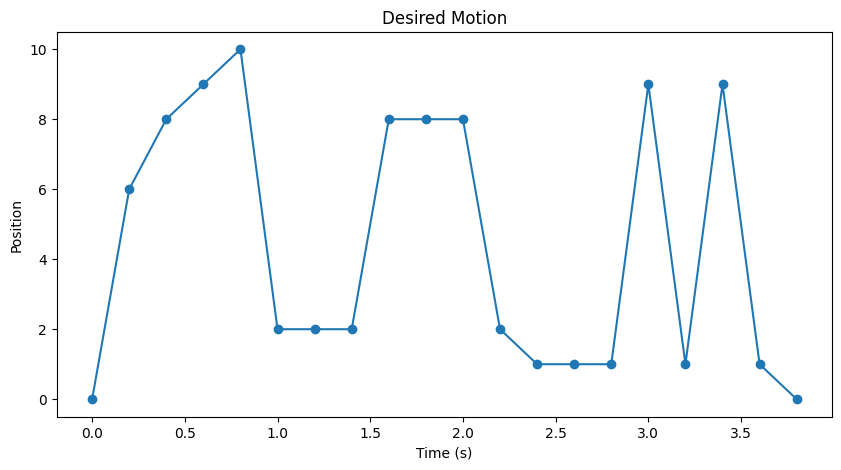

In [30]:
# The desired motion is hardcoded in the variable 'y' and plotted below
t = np.arange(0,20,1)/5
y = np.array([0,6,8,9,10,2,2,2,8,8,8,2,1,1,1,9,1,9,1,0,])

plt.figure(figsize=(10,5))
plt.plot(t,y, '-o')
plt.xlabel('Time (s)')
plt.ylabel('Position')
plt.title('Desired Motion')
plt.show()

[4.99999488e-01 5.50000051e+00 8.00000000e+00 8.99999997e+00
 8.50000642e+00 3.49999353e+00 2.00000009e+00 2.49999939e+00
 7.50000061e+00 7.99999999e+00 7.50000055e+00 2.49999945e+00
 9.99999999e-01 1.00000134e+00 2.19977113e+00 7.19998209e+00
 2.20015309e+00 7.20011180e+00 2.19998022e+00 3.33514007e-07]


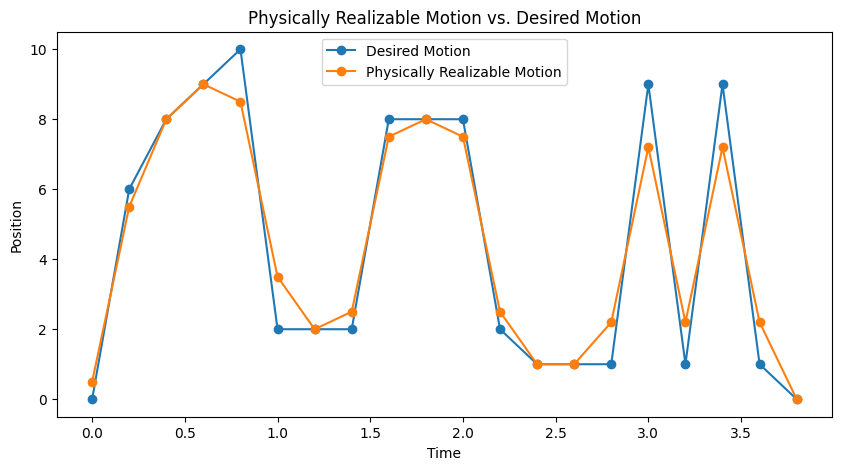

Error between desired and realized motion: 13.19979612024952


In [31]:
################# Edit the code below to solve for X #################
# You may want to create the matrix D here
D = np.eye(n)

x = cp.Variable(n) # creates a variable vector of size n to be optimized
objective = cp.Minimize(cp.sum_squares(D @ x - y)) # Fill in the objective function
constraints = [cp.abs(x[1:] - x[:-1]) <= 5] # Fill in the constraints
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)

# The optimal motion is stored in the variable 'x' and plotted below
plt.figure(figsize=(10,5))
plt.plot(t, y, '-o', label='Desired Motion')
plt.plot(t, x.value, '-o', label='Physically Realizable Motion')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Physically Realizable Motion vs. Desired Motion')
plt.legend()
plt.show()### 1.1 Solve Quiz 13 Problem

print(f"Error between desired and realized motion: {np.sum(np.abs(y-x.value))}")

### 1.2 Adding Penalties

Now assume that the robotic arm degrades over time when performing motion at a certain frequency or higher. <br>
We would like to add a penalty term to the Minimization to penalize frequecies that are equal to or higher than 1 Hz. <br>
Formally, put a penalty on the square of the magnitude of frequencies equal to or higher than 1 Hz. <br>
<br>
Hint: The function in the cvpxy library 'cp.abs()' may be useful. <br>
Suggestion: Writing out the optimization problem on paper first may be helpful.

[0.56587918 5.56567974 8.21109812 9.40530431 8.25388076 3.25382247
 1.89372509 2.77911763 6.99223602 8.22945715 7.49207335 3.09674015
 0.73813015 0.67609193 1.91169281 6.91177614 3.65315815 6.64908218
 1.64894397 0.07211069]


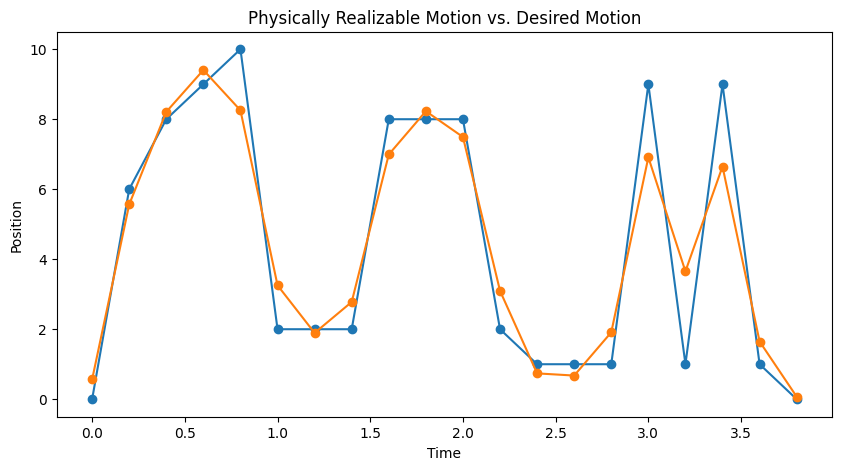

Error between desired and realized motion: 17.654649298053076


In [32]:
################# Edit the code below to solve for X #################

# You may want to create the matrix D here
D = np.eye(n)

# As well as the DFT matrix
DFT_matrix = np.fft.fft(np.eye(n))

x = cp.Variable(n) # creates a variable vector of size n to be optimized
alpha = 1e-1
objective = cp.Minimize(cp.sum_squares(D @ x - y) + alpha*cp.sum_squares((DFT_matrix @ x)[np.fft.fftfreq(n, d=1/5)>=1])) # '@' is the matrix multiplication operator
constraints = [cp.abs(x[1:]-x[:-1]) <= 5] # Fill in the constraints
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)

# The optimal motion is stored in the variable 'x' and plotted below
plt.figure(figsize=(10,5))
plt.plot(t, y, '-o', label='Desired Motion')
plt.plot(t, x.value, '-o', label='Physically Realizable Motion')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Physically Realizable Motion vs. Desired Motion')
plt.show()### 1.1 Solve Quiz 13 Problem

print(f"Error between desired and realized motion: {np.sum(np.abs(y-x.value))}")

Question 1: Why is the error between the desired and realized motion larger in Section 1.3 than Section 1.2?

Answer: Because we added a penalty term to the optimization problem, the optimization problem is now trying to minimize the error between the desired and realized motion, as well as minimize the penalty term. Therefore, the error between the desired and realized motion is larger in Section 1.3 than Section 1.2.

Question 2: Why does the solution in Section 1.3 differ greatly from the solution in Section 1.2 around the time 3-3.5 seconds?

Answer: Because we added a penalty term that penalizes the use of high frequencies, the optimization problem is now trying to minimize the error between the desired and realized motion, as well as minimize the penalty term. At the 3-3.5 second mark, the desired motion is a high frequency motion, so the optimization problem is trying to minimize the penalty term by minimizing the high frequency motion. Therefore, the solution in Section 1.3 differs greatly from the solution in Section 1.2 around the time 3-3.5 seconds.

## 2. FFT

In HW 4 you were asked to code the DFT and its properties from scratch. Since you know now how it works, we can use Python libraries that have optimized functions for computing the DFT to compare with out Naive implementation.

### DFT vs. FFT Speed Comparison

In this question, we want to measure how fast the FFT is compared to a naive implementation of the DFT. Some helper functions have been added for you. <br>
In order to see the difference, plot the time it takes to compute the DFT vs. FFT for different length signals of size (N). Make sure your plot spans from values of N from 2 to 16384.

In [33]:
def get_dft_matrix(x_signal):
    N = len(x_signal)
    dftmtx = np.fft.fft(np.eye(N))
    return dftmtx

def dft(x_signal):
    dftmtx = get_dft_matrix(x_signal)
    return np.matmul(dftmtx, x_signal)

def generate_random_signal(N):
    return np.random.randn(N)

100%|██████████| 21/21 [00:20<00:00,  1.04it/s]


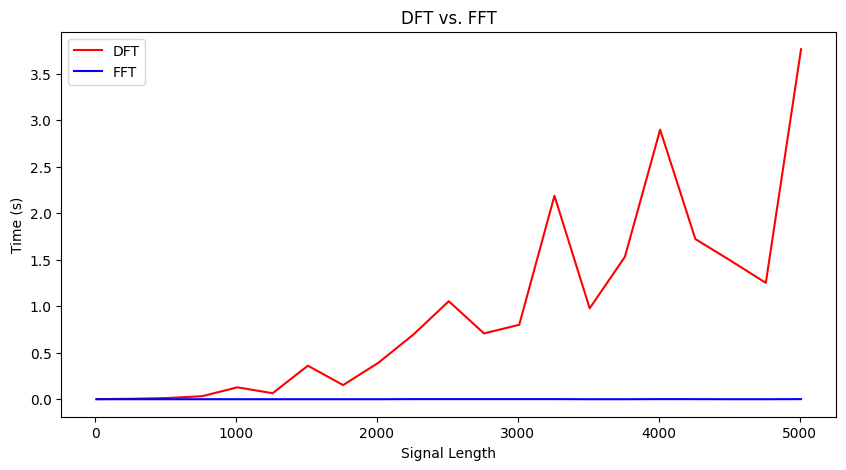

In [34]:
################# Write you code and make your plot below in this cell #################
# Your generated plot should have two curves, one for DFT and one for FFT
# The x-axis should be the length of the signal, and the y-axis should be the time it takes to compute the DFT/FFT
# Hint: use the time module and the time.time() function to measure the time it takes for computation
# Hint: use the np.fft.fft function to compute the FFT
# Hint: Use the functions defined above to compute the DFT

sizes = np.arange(10, 5020, 250)
DFT_time = []
FFT_time = []

for size in tqdm.tqdm(sizes):
    signal = generate_random_signal(size)
    start = time.time()
    dft(signal)
    end = time.time()
    DFT_time.append(end-start)
    start = time.time()
    np.fft.fft(signal)
    end = time.time()
    FFT_time.append(end-start)

plt.figure(figsize=(10,5))
plt.plot(sizes, DFT_time, 'r', label='DFT')
plt.plot(sizes, FFT_time, 'b', label='FFT')
plt.xlabel('Signal Length')
plt.ylabel('Time (s)')
plt.title('DFT vs. FFT')
plt.legend()
plt.show()

100%|██████████| 101/101 [00:04<00:00, 23.70it/s]


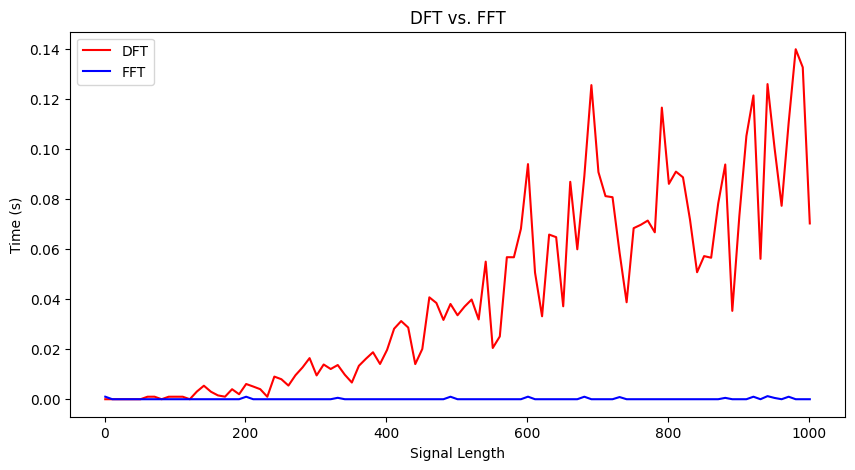

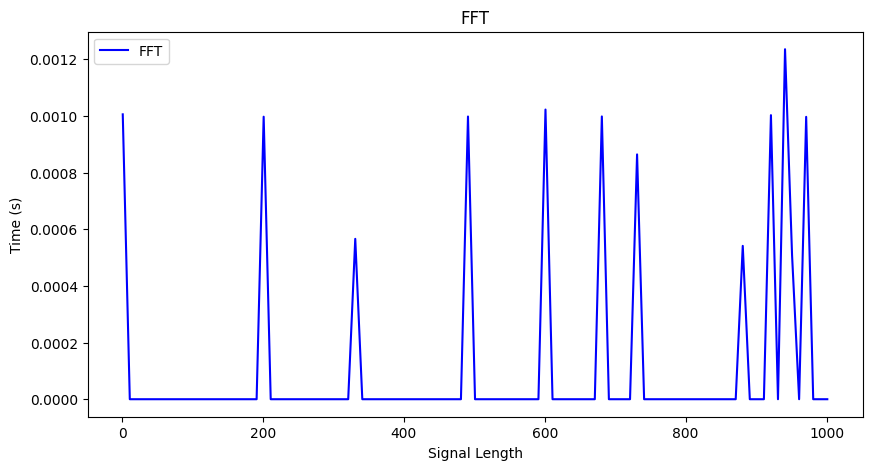

: 

In [35]:
# This DFT takes too long to show the difference between DFT and FFT, so we will need to show with a smaller range of signals
sizes = np.arange(1, 1002, 10)
DFT_time = []
FFT_time = []

for size in tqdm.tqdm(sizes):
    signal = generate_random_signal(size)
    start = time.time()
    dft(signal)
    end = time.time()
    DFT_time.append(end-start)
    start = time.time()
    np.fft.fft(signal)
    end = time.time()
    FFT_time.append(end-start)

plt.figure(figsize=(10,5))
plt.plot(sizes, DFT_time, 'r', label='DFT')
plt.plot(sizes, FFT_time, 'b', label='FFT')
plt.xlabel('Signal Length')
plt.ylabel('Time (s)')
plt.title('DFT vs. FFT')
plt.legend()
plt.show()

# Lets plot the FFT alone to get a better idea of how long it takes to compute when we have a larger signal
plt.figure(figsize=(10,5))
plt.plot(sizes, FFT_time, 'b', label='FFT')
plt.xlabel('Signal Length')
plt.ylabel('Time (s)')
plt.title('FFT')
plt.legend()
plt.show()

Question 2: What do you observe about the computational complexity of the naive DFT and FFT algorithms?

Answer: Looking at these plots, it is very evident that FFT is much faster than DFT. This can be shown by the fact that we are struggling to see something that isnt a flat line on the FFT plot, while the DFT plot is still very jagged. This is because the FFT algorithm is O(NlogN), while the DFT algorithm is O(N^2). This means that the FFT algorithm is much faster than the DFT algorithm.